Given loss function: $f(x_1,x_2)=\frac{1}{2}x_1^2-\frac{1}{2}x^2_2(1-\frac{1}{2}x^2_2)$, 
- Compute critical points (by hand using simple calculus)

 The Jacobian: $\nabla f(x) = \begin{bmatrix} \frac{\partial f}{\partial x_1} \\ \frac{\partial f}{\partial x_2} \end{bmatrix} = \begin{bmatrix} x_1 \\ -x_2 + x_2^3 \end{bmatrix}$
 
 A point $x^*$ is a critical point if $\nabla f(x^*) = 0$. For $f$ defined above, we have $x_1^*=0$ and $x_2^* = 0, 1, or -1$. 
 Hence, there are three critical points:
 
  $a= \begin{bmatrix}0 \\ -1 \end{bmatrix}$,  $b= \begin{bmatrix}0 \\ 0 \end{bmatrix}$,  $c= \begin{bmatrix}0 \\ 1 \end{bmatrix}$
 
- Qualify critical points as either local minima or saddle points, if there are any saddle points are they strict saddle points?

  The Hessian matrix: $\nabla^2 f(x) = \begin{bmatrix} \frac{\partial f}{\partial^2 x_1} & \frac{\partial f}{\partial x_1 \partial x_2} \\ \frac{\partial f}{\partial x_2 \partial x_1} & \frac{\partial f}{\partial^2 x_2}\end{bmatrix} = \begin{bmatrix} 1 & 0 \\ 0 & -1 + 3x_2^2\end{bmatrix}$

 Because the Hessian matrix is a diagonal matrix, its diagonal elements are the eigenvalues. 
 
 At critical points $a$ and $c$, the Hessian matrix is  $\begin{bmatrix}1 & 0\\ 0 & 2 \end{bmatrix}$, both eigenvalues are positive, so $a$ and $c$ are local minima.
 
 At critical point  $b$, the Hessian matrix is  $\begin{bmatrix}1 & 0\\ 0 & -1 \end{bmatrix}$. 
 In this case, the Hessian matrix has at least one eigenvalue that is negative, hence the critical point $b$ is a strict saddle point. 
 
- Implement gradient descent algorithm

In [0]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [0]:
def loss_function(x1, x2):
    return 0.5 * (x1 ** 2) - 0.5 * (x2 ** 2) * (1.0 - 0.5 * (x2 ** 2))


def plot_loss(loss):
    p = np.arange(len(loss))
    plt.plot(p, loss)
    plt.title('Loss per Iteration')
    plt.xlabel('Number of iterations')
    plt.ylabel('Loss')
    plt.show()


def plot_param_convergence(param, var='x1'):
    p = np.arange(len(param))
    plt.plot(p, param)
    plt.title('Parameter Convergence')
    plt.xlabel('Number of iterations')
    if var == 'x1':
        plt.ylabel('x1')
    else:
        plt.ylabel('x2')
    plt.show()


def loss_for_plot(w, b):
    w = np.atleast_3d(np.asarray(w))
    b = np.atleast_3d(np.asarray(b))
    return loss_function(w, b)


def plot_grad_path(true_x1, true_x2, x1, x2):
    n = 50

    x1_ = np.linspace(-3.0, 5.5, n)
    x2_ = np.linspace(-3.0, 4.0, n)

    z = loss_for_plot(x1_[np.newaxis, :, np.newaxis], x2_[:, np.newaxis, np.newaxis])
    z = np.squeeze(z)

    x_grid, y_grid = np.meshgrid(x1_, x2_)

    # A labeled contour plot for the cost function - marginal_llh
    plt.figure()
    level = np.arange(0.1, 100.0, 5.0)
    con = plt.contour(x_grid, y_grid, z, level, cmap='winter')
    plt.clabel(con)
    # the target parameter values indicated on the contour plot using the true parameter values
    plt.scatter(true_x1, true_x2, c='r')

    # Plot the path of parameter chosen and arrows indicating the gradient direction
    plt.scatter(x1[0], x2[0], c='g')
    for j in range(1, 500):
        if j != 0 and j % 100 == 0:
            plt.scatter(x1[j], x2[j], c='g')
            plt.annotate('', xy=(x1[j], x2[j]), xytext=(x1[j - 100], x2[j - 100]),
                         arrowprops=dict(arrowstyle="->", facecolor='green'))
    plt.title('Gradients Path with learning rate=1e-2')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.show()

The gradient descent algorithm with a constant step size $\eta > 0$ is implemented using the information given by the Jacobian: 

The Jacobian: $\nabla f(x) = \begin{bmatrix} \frac{\partial f}{\partial x_1} \\ \frac{\partial f}{\partial x_2}\end{bmatrix} = \begin{bmatrix} x_1 \\ -x_2 + x_2^3\end{bmatrix}$

In [0]:
tf.reset_default_graph()
n_iterations = 500
learning_rate = 0.01

# Build the computational graph
x1 = tf.get_variable('x1', shape=[],  initializer=tf.constant_initializer(5.0))
x2 = tf.get_variable('x2', shape=[], initializer=tf.constant_initializer(-0.1))

# uncomment to use random uniform initializer
# x1 = tf.get_variable('x1', shape=[], initializer=tf.initializers.random_uniform(-10.0, 10.0))
# x2 = tf.get_variable('x2', shape=[], initializer=tf.initializers.random_uniform(-10.0, 10.0))

loss = loss_function(x1, x2)
# parameter updates
grad_x1 = x1
grad_x2 = x2 ** 3 - x2
x1 = tf.assign(x1, x1 - learning_rate * grad_x1)
x2 = tf.assign(x2, x2 - learning_rate * grad_x2)

Before running the algorithm, we have a brief discussion on the limit points. 

For $x_1$, we have $x_1^{t+1} = (1 - \eta) x_1^t$,
- when $\eta < 1$: $ \lim_{t \to \infty} x_1^t = 0$
- when $\eta = 1$: $x_1^{t+1} = 0$ for all $t \geq 1$
- when $\eta > 1$:  $ \lim_{t \to \infty} x_1^t = \infty$ (divergence)

For $x_2$, we have $x_2^{t+1} = x_2^{t} +  \eta x_2^{t} (1 - (x_2^t)^2)$.  
The increment $\eta x_2^{t} (1 - (x_2^t)^2)$ is 
- $= 0$ for $x_2 = 0, 1, or -1$
- $> 0$ for $x_2 \in (-\infty, -1) \cup (0, 1)$
- $< 0$ for $x_2 \in (-1, 0) \cup (1, \infty)$

Hence, it follows 
$
    \lim_{t \to \infty} x_2^t=
    \begin{cases}
      -1, & \text{if}\ x_2^0 \in (-\infty, 0) \\
      0, & \text{if}\ x_2^0 = 0 \\
      1, & \text{if}\ x_2^0 \in (0, \infty)
    \end{cases}
$

In [0]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    loss_list = []
    var1 = []
    var2 = []

    for n in range(n_iterations):
        l, v1, v2 = sess.run([loss, x1, x2])
        loss_list.append(l)
        var1.append(v1)
        var2.append(v2)

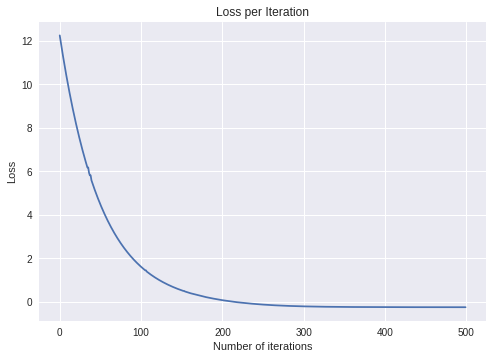

In [0]:
plot_loss(loss_list)

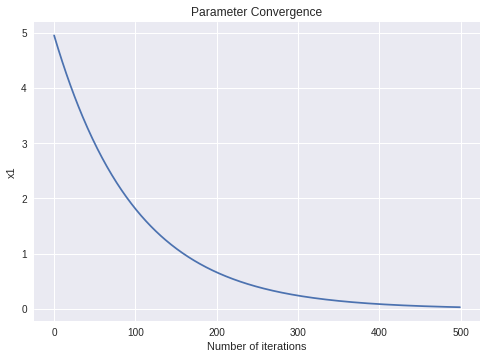

In [0]:
plot_param_convergence(var1, var='x1')

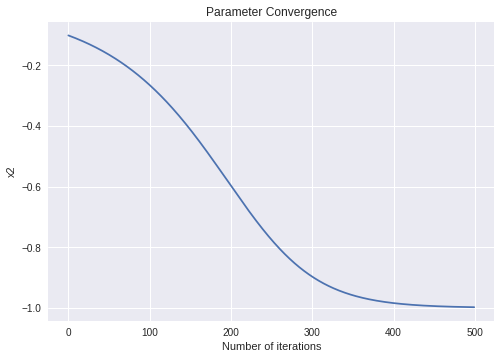

In [0]:
plot_param_convergence(var2, var='x2')

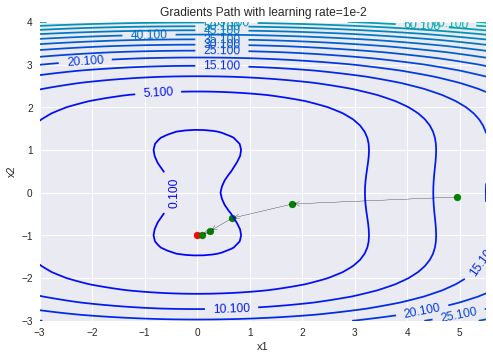

In [0]:
true_x1 = 0.0
true_x2 = -1.0
plot_grad_path(true_x1, true_x2, var1, var2)